# Simulation of a data set relating to eyesight

## Programming for Data Analysis Project 2019

## Preliminaries

Load the various packages required to complete the work and set up the matplotlib plotting environment.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.image as mpimg

Set plot preferences

In [2]:
# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (6, 4) #10,6
# Set font size for axes labels etc.
plt.rcParams['font.size'] = (14)

## If I use Seaborn:
## To pick a color palette
# sns.choose_colorbrewer_palette(data_type="q")

## Set up my Seaborn plotting preferences.
# current_palette = sns.color_palette()
# sns.palplot(current_palette)
# sns.set_style('whitegrid')


***
## 1. Introduction

For this project, we have been asked to simulate a real-world phenomenon of our own choosing. Our task is to model and synthesize data relating to this phenomenon using Python, in particular the numpy.random package. The end product of this project should be a synthesized data set.   

I will examine the phenomenon of eyesight, specifically short-sightedness (also referred to as myopia). The questions I want to address are: 
- what is the distribution of myopia in a random sample of the population?
- what are the factors that contribute to myopia?
- how are these individual factors/causes distributed in the population?
- are the causes related to each other in any way?
- if so, how?

***
## 2. Myopia

The README file that accompanies this notebook contains a comprehensive explanation of what myopia is, how it is quantified and corrected, and my reasons for wanting to study this phenomenon. I will briefly summarize those points here but I do want to minimize repetition. 

### 2.1 What is myopia?

Myopia is an eye condition that causes distant objects to appear blurry while only close objects appear clear. It is also referred to as short-sightedness. How close an object has to be to someone with myopia in order for them to see it clearly depends on that person's degree of myopia. It happens mainly because the eyeball grows too long and so light traveling through the eye comes to a focus in front of the retina (back surface) rather than exactly on it. Our brain records images that are formed **on** the retina, so the resulting image for a myopic person will be blurred. As light travels through the eye it is bent (refracted) by the cornea and lens. Myopia arises from the incorrect refraction of light for a particular eye; it is a refractive error.

<!--Drag and drop image to embed it-->
<!--Not rendering in GitHub so maybe insert another way-->
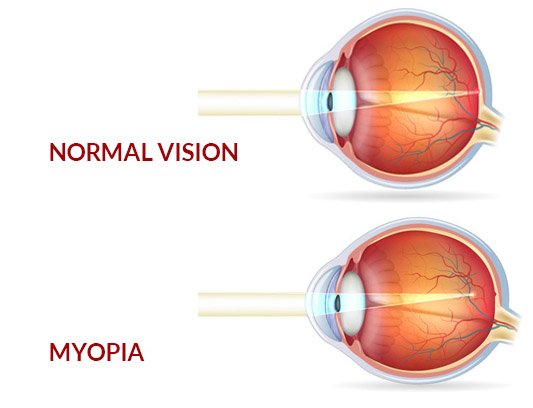

In [3]:
## Figure out later how to get rid of borders, axes, axes labels.
#image = mpimg.imread("images/myopia-and-normal.jpg")
#plt.imshow(image)
#plt.show()

### 2.2 How is it quantified and corrected?

All refractive errors are measured in Dioptres, the reciprocal of focal length in metres. 

$$D = 1/f(m)$$

The amount of myopia is quantified by the power of the lens required to correct it. Negative values are needed to correct myopia (move the best focus back onto the retina), so sort-sighted people have prescriptions like - 1.75 D, for example. The negative (concave) lenses used to correct myopia and are graduated in 0.25 D steps - the closest one to a patient's prescription is used. Differences smaller than this step size are imperceptible. 

Myopia is classified as:
- mild if the amount is less than 3 D
- moderate in the range -3 to -6 D
- high if more than -6 D

Text(6.2, 0.9, 'high')

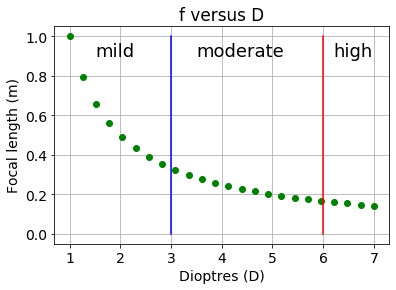

In [4]:
## Illustrate D vs f
d = np.linspace(1, 7, 24)
f = 1 / d

plt.plot(d, f, 'go')
plt.title("f versus D")
plt.xlabel("Dioptres (D)")
plt.ylabel("Focal length (m)")
plt.grid()
# Show limits
plt.plot([3, 3], [0, 1], 'b-')
plt.plot([6, 6], [0, 1], 'r-')
plt.text(1.5, 0.9, "mild", fontsize=18)
plt.text(3.5, 0.9, "moderate", fontsize=18)
plt.text(6.2, 0.9, "high", fontsize=18)

### 2.3 Why this question?

I'm interested in this topic because my teenage daughter has myopia. She started wearing glasses when she was nine years old, but it progressed very rapidly when she grew a lot at around 14 years. At that stage she had the same prescription as her dad, but because myopia progresses as you grow, her prescription would have been expected to increase all through her teenage years. She's now wearing special contact lenses in an attempt to slow its progression.

It's interesting to note that her dad has myopia, as do all of his siblings. In my family only one of six siblings is myopic. Myopia seems to be inherited and its severity increases through the generations, so that children frequently have more myopia than their parents if it's left untreated. People with high myopia are at greater risk of certain conditions such as retinal detachment, in later life, which can lead to blindness. 

***
## 3. Factors associated with myopia

***
## 4. Investigation of variables

In [5]:
# number of samples/observations in the data set
n = 1000

### 4.1 Genes

This variable will be called **genes**. It is a categorical variable which can take on one of three values depending on how many parents are myopic. Possible values are:
- none if neither parent is myopic
- some if one parent is
- strong if both parents are

In [6]:
# Classify genetic predisposition to myopia depending on how many parents are myopic
# 'none' if neither, 'some' if one, 'strong' if both
genetic_predisp = ['none', 'some', 'strong']

# In a random sample, what is the probability of finding each of these predispositions?
# EDIT need to investigate this.
# 25% have myopia, 4% high, so 75% don't.
genes = np.random.choice(genetic_predisp, n, p=[0.6, 0.3, 0.1])

# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
print(np.count_nonzero(genes == 'none'))
print(np.count_nonzero(genes == 'some'))
print(np.count_nonzero(genes == 'strong'))

618
288
94


This genetic predisposition will have some influence on how much myopia each person has. Not sure of scale factor from none to weak to strong.

### 4.2 Refractive error

This variable will be called **myopia**. It is a numerical variable, a negative real number with two decimal places. It has a maximum value of zero (no myopia) and it increases in the negative direction. I think a normal distribution would be a good place to start to represent this variable as that distribution is common in nature.  

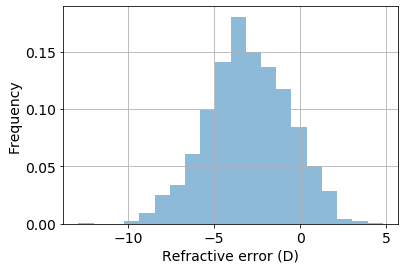

In [7]:
# Model refractive error with a normal distribution first.
m, s = -3.1, 2.4
n1 = np.random.normal(m, s, n)

plt.hist(n1, bins=20, density=True, alpha=0.5)
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")
plt.grid()

However, I don't want any positive values. For that reason, a truncated normal distribution would be a good candidate.
Look at prevalence  of myopia to find best mean and standard deviations to use.

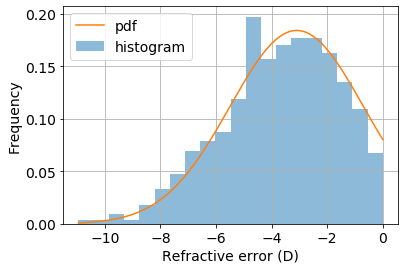

In [8]:
# Modified from:
# https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal

# mean, std
mu, sigma = -3.1, 2.4
lower, upper = -12, 0

#instantiate an object X using the above four parameters,
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

#generate 1000 sample data
samples = X.rvs(1000)

#compute the PDF of the sample data
pdf_probs = stats.truncnorm.pdf(samples, (lower-mu)/sigma, (upper-mu)/sigma, mu, sigma)

plt.hist(samples, bins= 20, density=True, alpha=0.5, label='histogram')
plt.plot(samples[samples.argsort()], pdf_probs[samples.argsort()], label='pdf')
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")

plt.legend()
plt.grid()

Define weak, moderate, high on this pdf. In UK 200,000 out of 5M have high myopia, that's 4%. Myopia is defined as a refractive error of $\leq$ 0.5 D and approximately 25% of people are myopic. The rest (75%) are not. So the histogram above must apply to people **with** myopia, not the general population. Perhaps those with a genetic predisposition could be sampled from here. The rest could be sampled from a uniform distribution with some noise added to throw some people into mild clinical myopia. 
*So, perhaps tie this to genetic factor above?*
OR select 75% from uniform 25% from trunc norm and apply genetics after as a boost.

Text(0, 0.5, 'D')

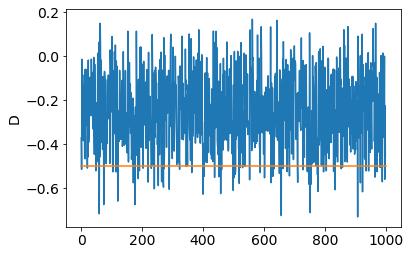

In [9]:
base =  np.random.uniform(0, -0.5, n) + np.random.normal(0, 0.1, n)
# Beware the pos values
x = np.arange(0, n)
plt.plot(x, base)
plt.plot([0, 1000], [-0.5, -0.5])
plt.ylabel('D')

### 4.3 Age
This variable will be called age. It is a numerical variable, a positive integer. It has a minimum value of zero and it increases in the positive direction. I need a distribution of ages in a population. Can then relate close work & hours to it as fn(age). Not as easy as I thought to find a distribution. What comes up a lot is the age-sex population pyramid. This is ....

I looked at the CSO website to find age population data from the 2016 census, with no distinction made between the genders. I'll read in the file and see what it looks like.  

In [10]:
# Read in 2016 census data 
df = pd.read_csv('data\census2016.csv', header=None, nrows=18)

# Generate an 'age' label = to mid point of each age bin in the file.
df['years'] = np.arange(2, 89, 5)

# Generate a label for population
df['pop'] = df.iloc[:,1]

# Normalize data to max population
df['npop'] = df['pop']/df['pop'].max()
df

,0,1,years,pop,npop
0,0 - 4 years,331515,2,331515,0.851302
1,5 - 9 years,355561,7,355561,0.913050
2,10 - 14 years,319476,12,319476,0.820387
3,15 - 19 years,302816,17,302816,0.777606
4,20 - 24 years,273636,22,273636,0.702674
5,25 - 29 years,297435,27,297435,0.763788
6,30 - 34 years,361975,32,361975,0.929521
7,35 - 39 years,389421,37,389421,1.000000
8,40 - 44 years,357460,42,357460,0.917927
9,45 - 49 years,326110,47,326110,0.837423


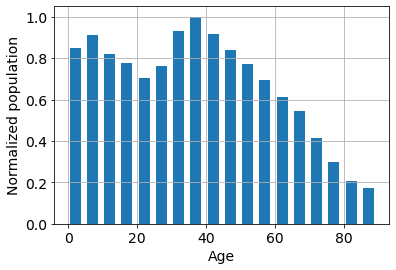

In [11]:
# What does this look like on a bar chart?
plt.bar(df['years'], df['npop'], width=3.2)
plt.xlabel('Age')
plt.ylabel('Normalized population')
plt.grid()

I would like to find a distribution that mimics this. The numpy random triangular distribution is often used when the underlying distribution is not known, but the limits and the mode are. I will use two triangular distributions, one with mode=7 and the other with mode=37. I'll join the two random samples and then pick n at random from the resulting array.

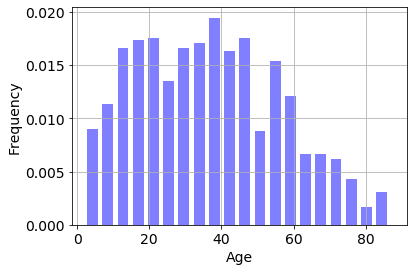

In [35]:
# Set up a distribution with mode = 7.
young = np.random.triangular(0, 7, 90, n)
#plt.hist(young, bins=20, density=True, alpha=0.3, FaceColor='g')

old = np.random.triangular(0, 37, 90, n)
#plt.hist(old, bins=20, density=True, alpha=0.3, FaceColor='r')

# Join them.
a = np.concatenate((young, old), axis=None)
#np.size(a)

#Pick n at random from the list
age = np.random.choice(a, n, replace=True)

plt.hist(age, bins=20, width=3, density=True, alpha=0.5, FaceColor='b' )
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()

In [18]:
# Do in a few lines with:

r = np.concatenate((np.random.triangular(0, 7, 90, n), np.random.triangular(0, 37, 90, n)), axis=None)
age = np.random.choice(r, n, replace=True)
#plt.hist(age, bins=20, width=3.2, density=True, alpha=0.4)

### 4.4 Environmental factors

In [14]:
# Expect this to vary with age

### 4.5 Close work

In [15]:
# Maybe also varies with age, or opposite to environment?